# 2D-Euclidean metric space experiments

In [1]:
import cvrpy
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
uniform_generator = cvrpy.UniformPositionsGenerator(dimensions=2)
gaussian_generator = cvrpy.GaussianPositionsGenerator(dimensions=2, sigma=0.15)
shifted_gaussian_generator = cvrpy.MultiGaussianPositionsGenerator(dimensions=2, sigma=0.1, centers=[[0.5,0.65]])
multigaussian_generator = cvrpy.MultiGaussianPositionsGenerator(dimensions=2, sigma=0.05, 
                                                                centers=[[0.5,0.9],[0.5,0.3],[0.35,0.6],[0.65,0.6]])

In [10]:
rules = [   
            cvrpy.MaxNashConflict(),
            cvrpy.ChamberlainCourant(),
            cvrpy.Borda(),

]


rules_names = [ "MaxNash", "CC", "Borda"]
n_trys = 10000
n_voters = 100
n_candidates = 10

def run_experiments(profile_generator, n_voters, n_candidates, n_trys):
    positions = np.zeros((len(rules), n_trys*2, 2))
    metrics = np.zeros((len(rules), n_trys, 4))


    for k in tqdm(range(n_trys)):

        preferences = profile_generator(n_voters, n_candidates)
        candidates = profile_generator.candidates_positions

        for i in range(len(rules)):
            rule = rules[i]
            rule(preferences)
            selected_pair = rule.selected_pair()
            positions[i,2*k,:] = candidates[selected_pair[0]]
            positions[i,2*k+1,:] = candidates[selected_pair[1]]
            alpha = cvrpy.getAlpha(preferences, selected_pair[0], selected_pair[1])
            beta = cvrpy.getBeta(preferences, selected_pair[0], selected_pair[1])
            gamma = cvrpy.getGamma(preferences, selected_pair[0], selected_pair[1])
            swapDistance = cvrpy.getSwapDistance(preferences, selected_pair[0], selected_pair[1])
            metrics[i,k,:] = [alpha,beta,gamma,swapDistance]
    return positions, metrics

In [11]:

def save_data(positions, metrics, rules_names, distrib_name):
    for i in range(len(rules)):
        df = pd.DataFrame(positions[i,:,:])
        df.to_csv(f"data_out/metric_{distrib_name}_{rules_names[i]}_winner_positions.csv", index=False, header=False)
        df = pd.DataFrame(metrics[i,:,:])
        df.to_csv(f"data_out/metric_{distrib_name}_{rules_names[i]}_winner_metrics.csv", index=False, header=False)


In [12]:
profile_generator = cvrpy.MetricGenerator(uniform_generator,uniform_generator)
positions, metrics = run_experiments(profile_generator, n_voters, n_candidates, n_trys)
save_data(positions, metrics, rules_names, "uniform")

100%|██████████| 10000/10000 [02:39<00:00, 62.74it/s]


In [13]:
profile_generator = cvrpy.MetricGenerator(gaussian_generator,gaussian_generator)
positions, metrics = run_experiments(profile_generator, n_voters, n_candidates, n_trys)
save_data(positions, metrics, rules_names, "gaussian")

100%|██████████| 10000/10000 [02:32<00:00, 65.54it/s]


Below, we show for the two different dataset the positions of the winning alternatives on the 2D space.

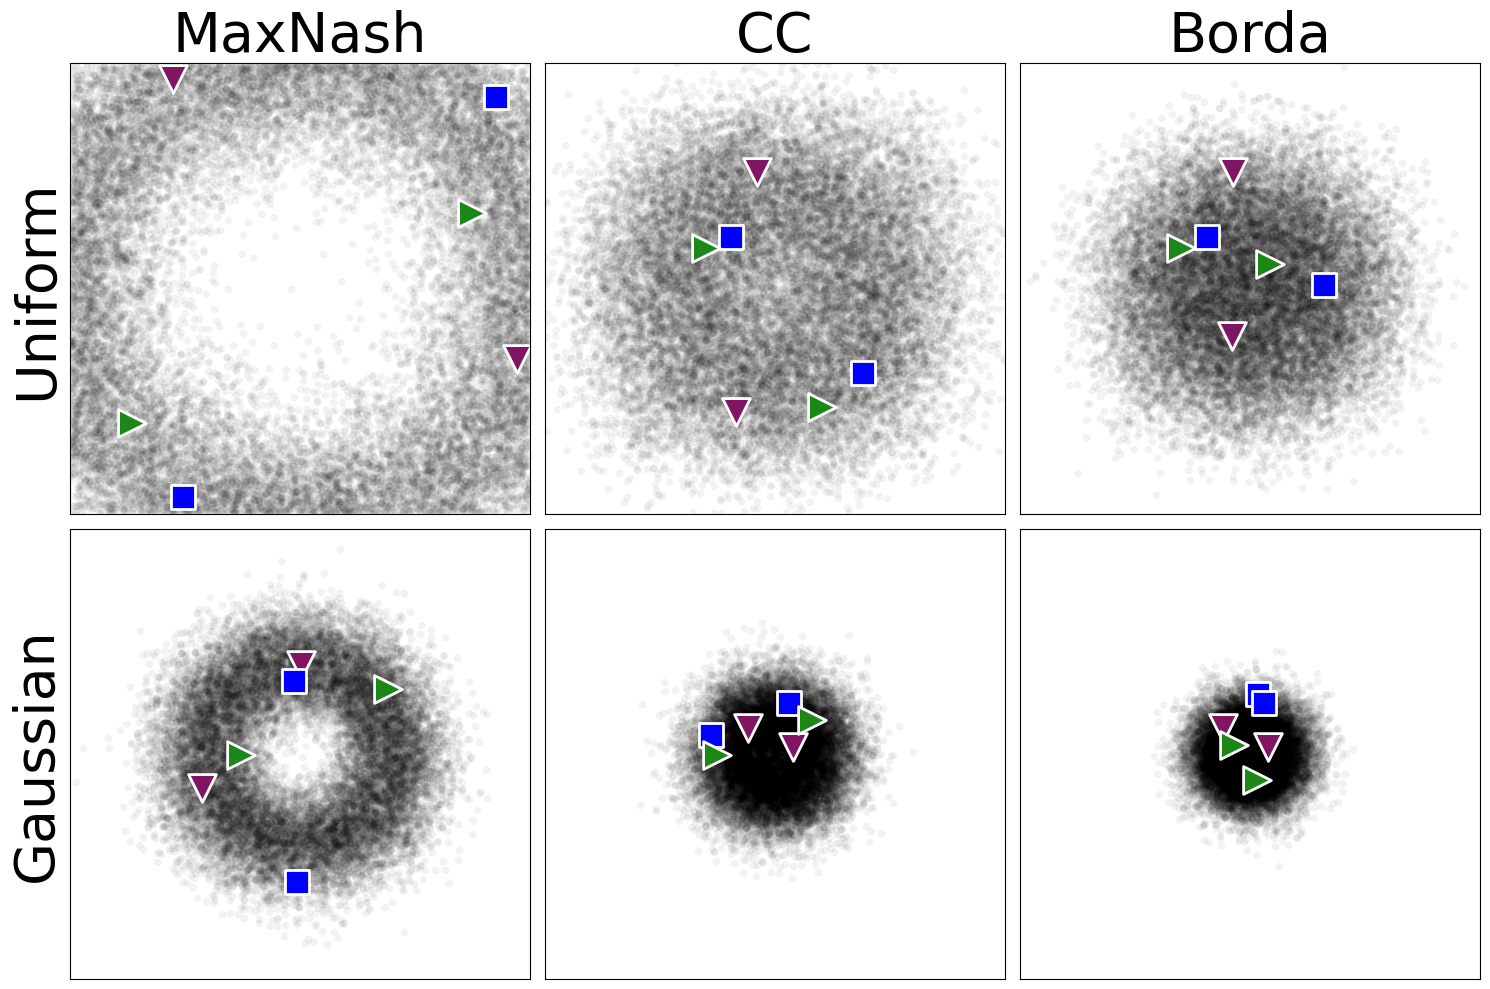

In [14]:

rules_names_fig = ["MaxNash", "CC", "Borda"]
distrib = ["uniform", "gaussian"]
distrib_name = ["Uniform", "Gaussian"]

fig, axs=  plt.subplots(2,3,figsize=(15,10))
for i in range(len(distrib)):
    r1 = 92
    r2 = 84
    r3 = 84
    for j in range(len(rules_names_fig)):
        ax = axs[i,j]
        positions = pd.read_csv(f"data_out/metric_{distrib[i]}_{rules_names_fig[j]}_winner_positions.csv", header=None).to_numpy()
        ax.scatter(positions[:,0], positions[:,1],alpha=0.05,color="k",linewidths=0, s=30)
        ax.scatter(positions[2*r1:2*r1+2,0], positions[2*r1:2*r1+2,1],color="#801663",linewidths=2, s=400, edgecolors="white",marker="v")
        ax.scatter(positions[2*r2+2:2*r2+4,0], positions[2*r2+2:2*r2+4,1],color="b",linewidths=2, s=300, edgecolors="white",marker="s")
        ax.scatter(positions[2*r3+4:2*r3+6,0], positions[2*r3+4:2*r3+6,1],color="#1b8717",linewidths=2, s=400, edgecolors="white",marker=">")
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        # No ticks 
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title(rules_names_fig[j], fontsize=40)
        if j == 0:
            ax.set_ylabel(distrib_name[i], fontsize=40)

# white background
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig("figures/positions.png", dpi=300)
plt.show()